In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [663]:
# Generate training data
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
        
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)

In [664]:
x_train, y_train = generate_linear(n=100)
x_train_1 , y_train_1 = generate_XOR_easy()

In [665]:
# Active function
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

In [666]:
# Display funtion
'''
  x: data
  y: corresponding data groundtruth
  y_pred: if given, plot the compare graph with this prediction result,
          the result is in range [0, 1], so value with greater than 0.5 
          will be recognized as Class 1 and less than 0.5 as Class 0
'''
def show_result(x, y, y_pred = None):
    if y_pred is not None:
        plt.subplot(1, 2, 1)
        plt.title("Ground truth", fontsize = 18)
        for i in range(x.shape[0]):
            if y[i] == 0:
                plt.plot(x[i][0], x[i][1], 'ro')
            else:
                plt.plot(x[i][0], x[i][1], 'bo')
    else:
        plt.title("Ground truth", fontsize = 18)
        for i in range(x.shape[0]):
            if y[i] == 0:
                plt.plot(x[i][0], x[i][1], 'ro')
            else:
                plt.plot(x[i][0], x[i][1], 'bo')
    if y_pred is not None:
        plt.subplot(1, 2, 2)
        plt.title("Predict result", fontsize = 18)
        for i in range(x.shape[0]):
            if y_pred[i] < 0.5:
                plt.plot(x[i][0], x[i][1], 'ro')
            else:
                plt.plot(x[i][0], x[i][1], 'bo')

# NN Architecture 
Input(2) -> FC1(2) -> FC(2) -> OUT(1)

In [667]:
'''
  x: input with 2 channel
  W: weight
'''
def forward(x, W):
    w1, w2, w3 = W
    # Forward
    z1 = np.dot(x, w1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w3)
    y_pred = sigmoid(z3)
    return y_pred

In [668]:
# Random initial weight and return 
def init_weight():
    w1 = np.random.randn(2, 2)
    w2 = np.random.randn(2, 2)
    w3 = np.random.randn(2, 1)
    print("w1 initial: \n", w1)
    print("w2 initial: \n", w2)
    print("w3 initial: \n", w3)
    return [w1, w2, w3]

In [694]:
# Save result
def save_result():
    global w1, w2, w3
    W = [w1, w2, w3]
    print('Result saved.')
    return W

In [736]:
# Train
loss_sum = 0
loss_type = 'Cross Entropy'
#loss_type = 'MSE'
'''
  x: training data
  y: corresponding groundtruth
  i: epoch now
  j: index of data now
  model: indicate which model, 0 for linear separable and 1 for XOR
'''
def train(x, y, i = None, j = None, model = 0):
    global w1, w2, w3
    # Forward
    z1 = np.dot(x, w1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w3)
    y_pred = sigmoid(z3)

    
    # Loss
    if loss_type == 'Cross Entropy':
        loss = -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
        loss_grad = (y_pred - y)/ (y_pred * (1-y_pred))

    if loss_type == 'MSE':
        loss = (y - y_pred)**2 /2.
        loss_grad = y_pred - y 
    
    w3_grad = np.zeros((2, 1))
    w2_grad = np.zeros((2, 2))
    w1_grad = np.zeros((2, 2))
    
    w3_grad[0] = loss_grad * derivative_sigmoid(y_pred) * a2[0]
    w3_grad[1] = loss_grad * derivative_sigmoid(y_pred) * a2[1]
    
    way_1 = loss_grad * derivative_sigmoid(y_pred) * w3[0] * derivative_sigmoid(a2[0])
    way_2 = loss_grad * derivative_sigmoid(y_pred) * w3[1] * derivative_sigmoid(a2[1])
    
    w2_grad[0][0] = way_1 * a1[0]
    w2_grad[0][1] = way_2 * a1[0]
    w2_grad[1][0] = way_1 * a1[1]
    w2_grad[1][1] = way_2 * a1[1]
    
    way_3 = way_1 * w2[0][0] * derivative_sigmoid(a1[0]) + \
            way_2 * w2[0][1] * derivative_sigmoid(a1[0])
    way_4 = way_1 * w2[1][0] * derivative_sigmoid(a1[1]) + \
            way_2 * w2[1][1] * derivative_sigmoid(a1[1])
    
    w1_grad[0][0] = way_3 * x[0]
    w1_grad[0][1] = way_4 * x[0]
    w1_grad[1][0] = way_3 * x[1]
    w1_grad[1][1] = way_4 * x[1]
    
    # Update weight
    w1 -= learning_rate * w1_grad
    w2 -= learning_rate * w2_grad
    w3 -= learning_rate * w3_grad
    global loss_sum
    loss_sum += abs(loss[0])
    
    if model == 0:
        NUM = 100.
        FREQ = 500
    else:
        NUM = 21.
        FREQ = 10000
    
    if((i+1)%FREQ == 0 and j == NUM - 1):
        print("Epoch: {:5d}, loss: {}".format(i+1, loss_sum/NUM /(i+1)))
        loss_sum = 0
        

In [695]:
# Train linear separable model
epoch = 10000
learning_rate = 1e-2
w1, w2, w3 = init_weight()
for i in range(epoch):
    for j in range(100):
        train(x_train[j], y_train[j], i, j)
        
print("Training process terminated.")
        
# Save result
W_s = save_result()

w1 initial: 
 [[-0.9902362  -1.25119296]
 [-0.76454547  1.17914138]]
w2 initial: 
 [[-1.73260983 -0.50603203]
 [-2.57926341 -0.93094966]]
w3 initial: 
 [[-0.86225917]
 [ 0.34191415]]
Epoch:   500, loss: 0.3314948712384617
Epoch:  1000, loss: 0.028702003860205834
Epoch:  1500, loss: 0.011512645607211174
Epoch:  2000, loss: 0.006168438134571162
Epoch:  2500, loss: 0.0036811162905662086
Epoch:  3000, loss: 0.002345513841132614
Epoch:  3500, loss: 0.0015711535229156594
Epoch:  4000, loss: 0.00109726885864293
Epoch:  4500, loss: 0.0007941885448145192
Epoch:  5000, loss: 0.0005927922425479315
Epoch:  5500, loss: 0.00045436946275137795
Epoch:  6000, loss: 0.000356342782077216
Epoch:  6500, loss: 0.0002850632544254573
Epoch:  7000, loss: 0.00023200638827512338
Epoch:  7500, loss: 0.0001916874569416953
Epoch:  8000, loss: 0.0001604804655233934
Epoch:  8500, loss: 0.0001359282646696013
Epoch:  9000, loss: 0.00011632792660808144
Epoch:  9500, loss: 0.00010047487283187842
Epoch: 10000, loss: 8.750

In [737]:
# Train XOR model
epoch = 100000
learning_rate = 1e-2
w1, w2, w3 = init_weight()
for i in range(epoch):
    for j in range(21):
        train(x_train_1[j], y_train_1[j], i, j, 1)
        
print("Training processing terminated.")

# Save model
W_xor = save_result()


w1 initial: 
 [[ 0.66070695  0.53814972]
 [-0.58067608 -0.28897079]]
w2 initial: 
 [[ 0.54699068 -0.10444557]
 [-0.13682236  0.14277819]]
w3 initial: 
 [[-0.46707251]
 [-1.77685173]]
Epoch: 10000, loss: 0.6928315701482569
Epoch: 20000, loss: 0.34596318613313426
Epoch: 30000, loss: 0.13746461389509151
Epoch: 40000, loss: 0.021523841447525397
Epoch: 50000, loss: 0.009752837611820976
Epoch: 60000, loss: 0.005830916512874226
Epoch: 70000, loss: 0.00391488553985565
Epoch: 80000, loss: 0.002818660278065287
Epoch: 90000, loss: 0.0021291546680293526
Epoch: 100000, loss: 0.0016662130787930374
Training processing terminated.
Result saved.


# Test

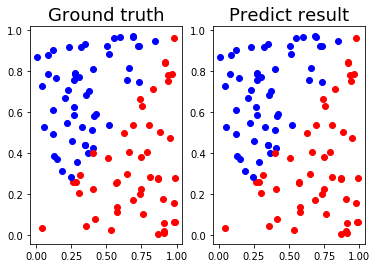

In [716]:
show_result(x_train, y_train, forward(x_train, Ws))

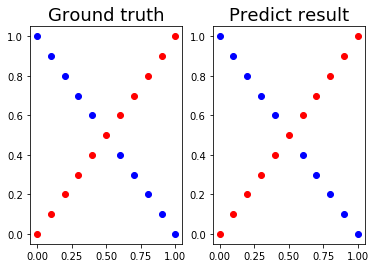

In [739]:
show_result(x_train_1, y_train_1, forward(x_train_1, W_xor))

In [750]:
forward(np.array([0.15, 0.15]), W_s)

array([0.02480135])